In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
!pip install scikit-dsp-comm

     |████████████████████████████████| 90 kB 5.0 MB/s 


In [ ]:
import sk_dsp_comm.sigsys as ss
import sk_dsp_comm.fir_design_helper as fir_d
import sk_dsp_comm.iir_design_helper as iir_d
import sk_dsp_comm.multirate_helper as mrh
import scipy.signal as signal

In [ ]:
L = int(input("Enter value of L for upsample: "))

Enter value of L for upsample: 4


In [ ]:
M = int(input("Enter value of M for downsample: "))

Enter value of M for downsample: 4


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


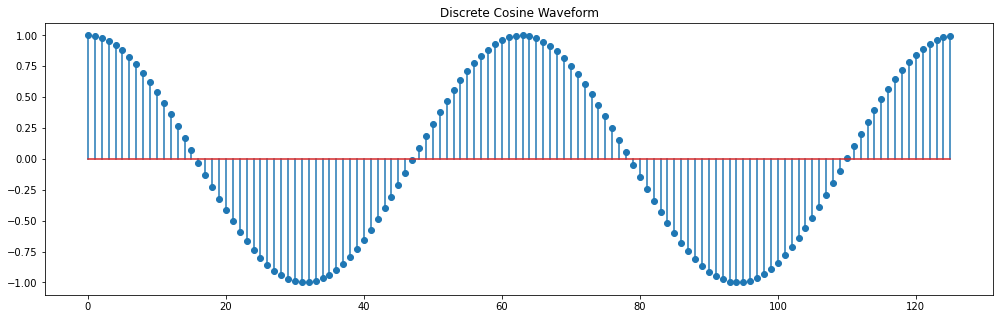

In [ ]:
# COSINE FUNCTION:
plt.figure(figsize=(17,5))
x = np.arange(0, 4*np.pi, 0.1)
y = np.cos(x)
plt.stem(y)
plt.title("Discrete Cosine Waveform")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


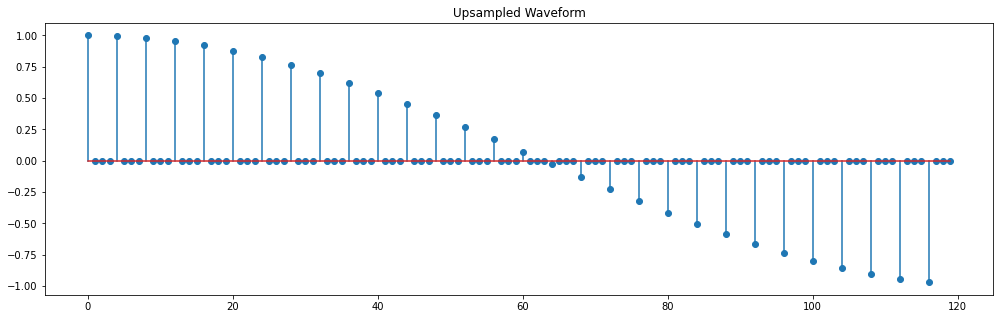

In [ ]:
# UPSAMPLING:
plt.figure(figsize=(17,5))
y_up = ss.upsample(y, L)
plt.stem(y_up[0:120])
plt.title("Upsampled Waveform")
plt.show()

In [ ]:
print(y_up.shape)
print(y.shape)

(504,)
(126,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


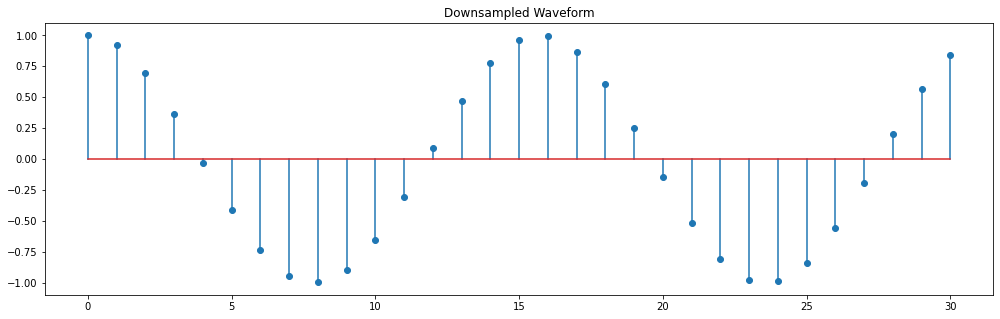

In [ ]:
# DOWNSAMPLING:
plt.figure(figsize=(17,5))
y_down = ss.downsample(y, M)
plt.stem(y_down)
plt.title("Downsampled Waveform")
plt.show()

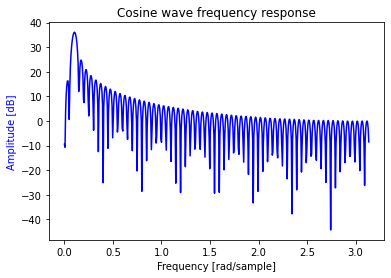

In [ ]:
# Frequency Domain:
w, h = signal.freqz(y)
fig, ax = plt.subplots()
ax.set_title('Cosine wave frequency response')
ax.plot(w, 20 * np.log10(abs(h)), 'b')
ax.set_ylabel('Amplitude [dB]', color='b')
ax.set_xlabel('Frequency [rad/sample]')
plt.show()

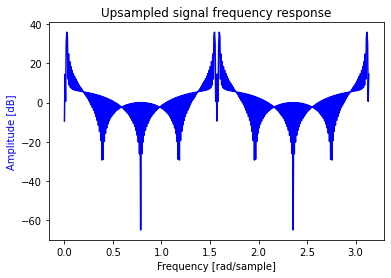

In [ ]:
w, h = signal.freqz(y_up)
fig, ax = plt.subplots()
ax.set_title('Upsampled signal frequency response')
ax.plot(w, 20 * np.log10(abs(h)), 'b')
ax.set_ylabel('Amplitude [dB]', color='b')
ax.set_xlabel('Frequency [rad/sample]')
plt.show()

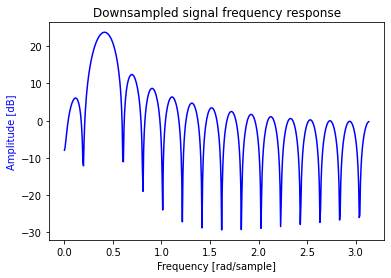

In [ ]:
w, h = signal.freqz(y_down)
fig, ax = plt.subplots()
ax.set_title('Downsampled signal frequency response')
ax.plot(w, 20 * np.log10(abs(h)), 'b')
ax.set_ylabel('Amplitude [dB]', color='b')
ax.set_xlabel('Frequency [rad/sample]')
plt.show()

In [ ]:
# INTERPOLATION:
import pandas as pd

In [ ]:
y_up

array([ 1.        ,  0.        ,  0.        ,  0.        ,  0.99500417,
        0.        ,  0.        ,  0.        ,  0.98006658,  0.        ,
        0.        ,  0.        ,  0.95533649,  0.        ,  0.        ,
        0.        ,  0.92106099,  0.        ,  0.        ,  0.        ,
        0.87758256,  0.        ,  0.        ,  0.        ,  0.82533561,
        0.        ,  0.        ,  0.        ,  0.76484219,  0.        ,
        0.        ,  0.        ,  0.69670671,  0.        ,  0.        ,
        0.        ,  0.62160997,  0.        ,  0.        ,  0.        ,
        0.54030231,  0.        ,  0.        ,  0.        ,  0.45359612,
        0.        ,  0.        ,  0.        ,  0.36235775,  0.        ,
        0.        ,  0.        ,  0.26749883,  0.        ,  0.        ,
        0.        ,  0.16996714,  0.        ,  0.        ,  0.        ,
        0.0707372 ,  0.        ,  0.        ,  0.        , -0.02919952,
        0.        ,  0.        ,  0.        , -0.12884449,  0.  

In [ ]:
y_up_series = pd.Series(y_up)
y_up_series = y_up_series.replace(to_replace=0.000000, value=np.nan)
y_up_interpolated = y_up_series.interpolate(method='pad', limit=2)
y_up_interpolated

0      1.000000
1      1.000000
2      1.000000
3           NaN
4      0.995004
         ...   
499         NaN
500    0.997798
501    0.997798
502    0.997798
503         NaN
Length: 504, dtype: float64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


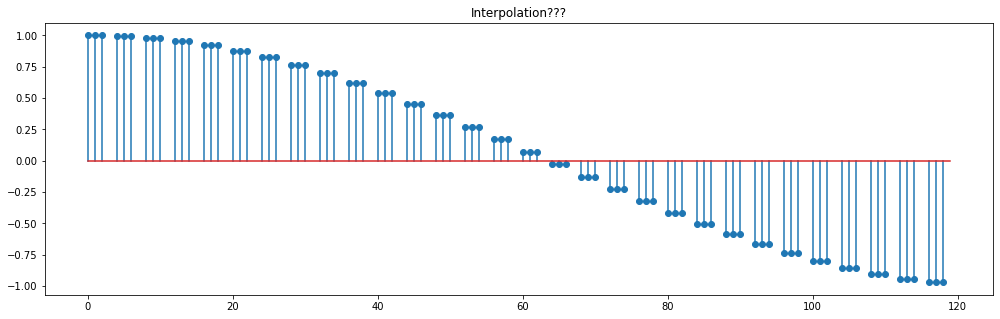

In [ ]:
plt.figure(figsize=(17,5))
plt.stem(y_up_interpolated[0:120])
plt.title("Interpolation???")
plt.show()